# 1

In [45]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm
import os
import warnings 

warnings.filterwarnings("ignore")

plt.style.use('fivethirtyeight')

In [46]:
quandl.ApiConfig.api_key = 'cypKeYvAb2D_jLBN8sDp'

# 2-3

In [47]:
# Importing State Energy/Airline Ticket Price Variables
data = quandl.get('EIA/STEO_ACTKFUS_A')

In [48]:
data.head(5)

,Value
Date,
1990-12-31,148.358333
1991-12-31,155.175000
1992-12-31,155.241667
1993-12-31,178.725000
1994-12-31,185.483333


In [49]:
data.columns

Index(['Value'], dtype='object')

In [50]:
type(data)

pandas.core.frame.DataFrame

# 4

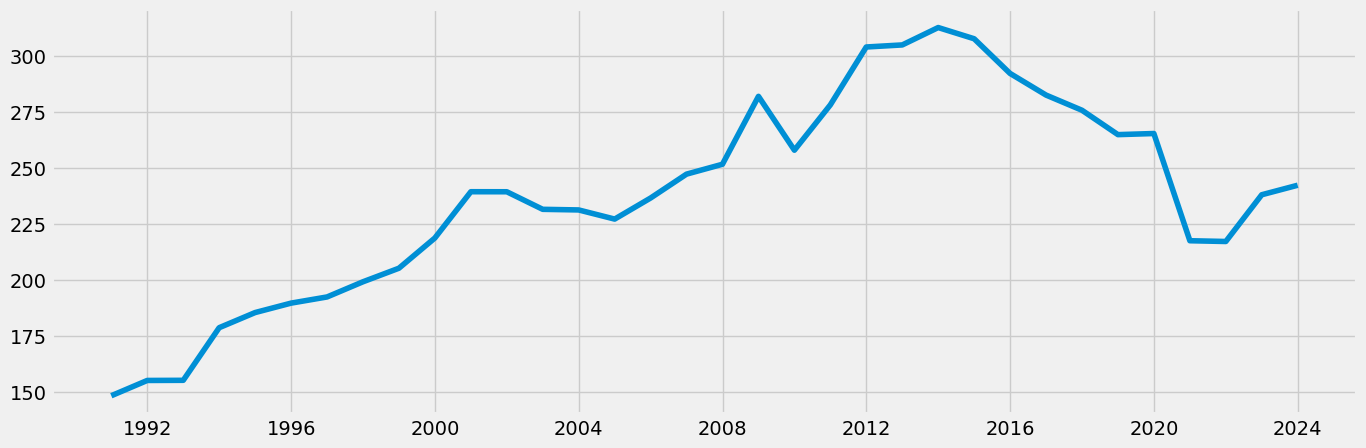

In [51]:
plt.figure(figsize=(15,5), dpi=100)
plt.plot(data)

Airline Ticket Prices seem farily straightforward. It gradually rises over time and then begins to drop around 2016. I'm honestly not quite sure for the reason behind that,maybe prices reached a breaking point, but you can see a steep drop in 2020 due to Covid 19.

In [52]:
data_2 = data.reset_index()

In [53]:
data_2.head()

,Date,Value
0,1990-12-31,148.358333
1,1991-12-31,155.175000
2,1992-12-31,155.241667
3,1993-12-31,178.725000
4,1994-12-31,185.483333


In [54]:
data_sub = data_2.loc[(data_2['Date'] >= '2008-01-01') & (data_2['Date'] < '2021-06-01')]

In [55]:
data_sub.shape

(13, 2)

In [56]:
data_sub.head()

,Date,Value
18,2008-12-31,281.998250
19,2009-12-31,257.964833
20,2010-12-31,278.186083
21,2011-12-31,304.026083
22,2012-12-31,304.950083


In [57]:
from datetime import datetime

data_sub['datetime'] = pd.to_datetime(data_sub['Date'])
data_sub = data_sub.set_index('datetime') 
data_sub.drop(['Date'], axis=1, inplace=True) 
data_sub.head()

,Value
datetime,
2008-12-31,281.998250
2009-12-31,257.964833
2010-12-31,278.186083
2011-12-31,304.026083
2012-12-31,304.950083


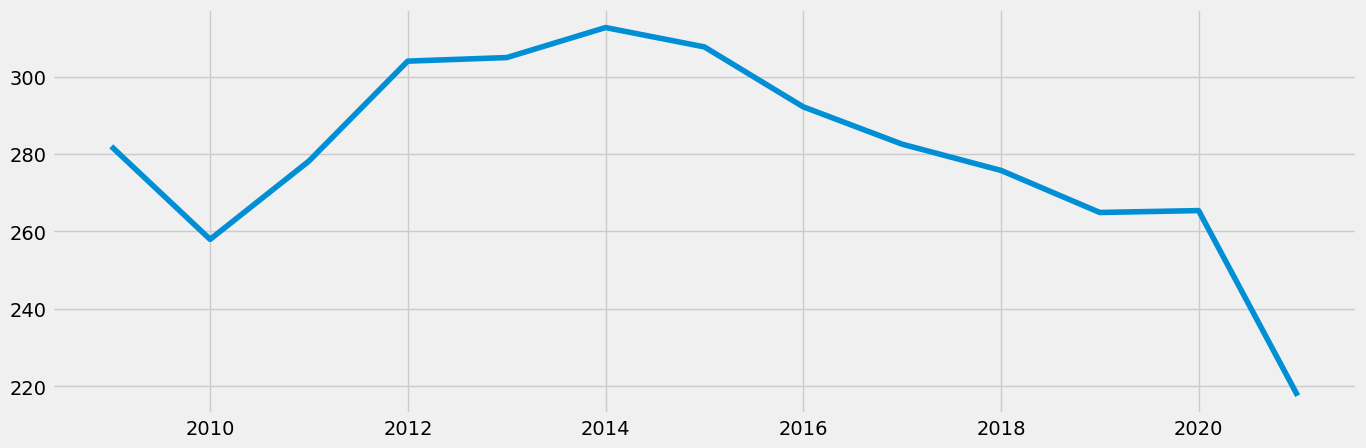

In [58]:
# Plot new data set

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_sub)

In [59]:
# Check for missing values
data_sub.isnull().sum() 

Value    0
dtype: int64

In [60]:
# Check for duplicates
dups = data_sub.duplicated()
dups.sum()

0

# 5

In [61]:
decomposition = sm.tsa.seasonal_decompose(data_sub, model='additive')

In [62]:
from pylab import rcParams 

rcParams['figure.figsize'] = 18, 7

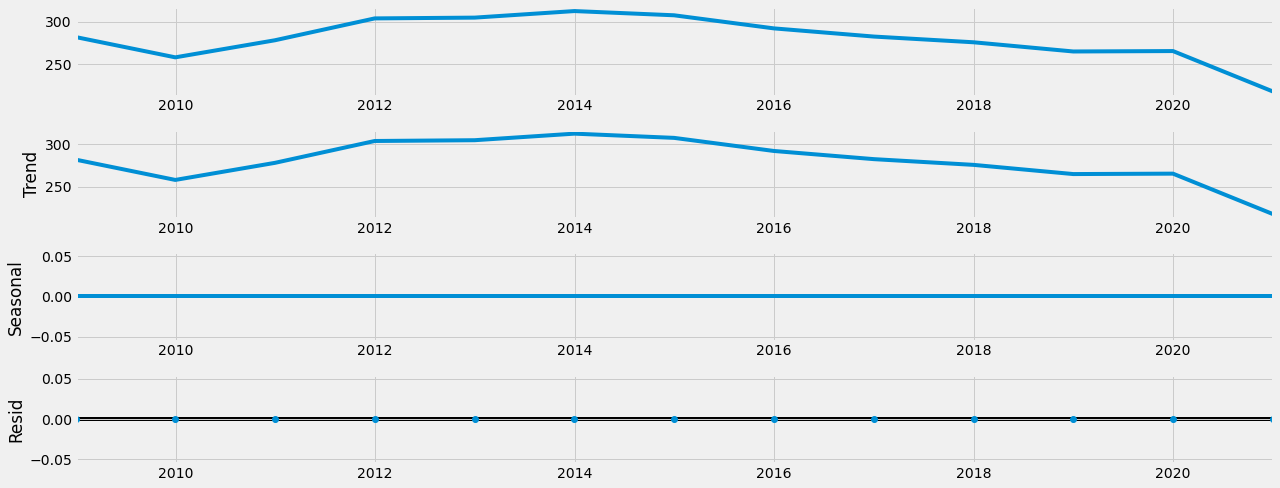

In [63]:
# Plot separate components

decomposition.plot()
plt.show()

# 6

In [64]:
from statsmodels.tsa.stattools import adfuller

def dickey_fuller(timeseries): 

    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)


dickey_fuller(data_sub['Value'])

Dickey-Fuller Stationarity test:
Test Statistic                  0.041321
p-value                         0.961819
Number of Lags Used             0.000000
Number of Observations Used    12.000000
Critical Value (1%)            -4.137829
Critical Value (5%)            -3.154972
Critical Value (10%)           -2.714477
dtype: float64


The test statistic is larger than the critical value and the p-value is large than .05 meaning the results can't reject the null hypothesis and are insignificant.

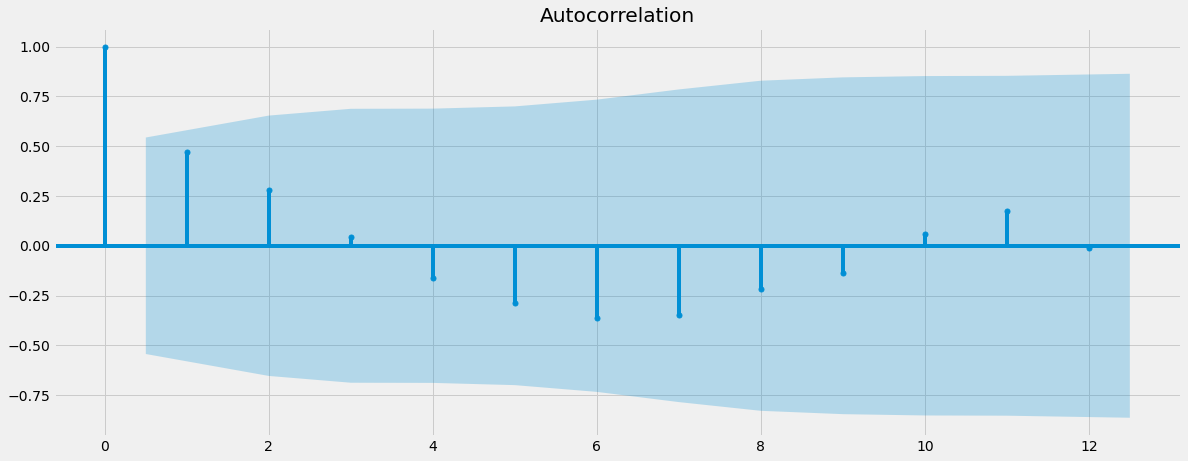

In [65]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 

plot_acf(data_sub)
plt.show()

# 7-8

In [113]:
data_diff = data_sub - data_sub.shift(5)

In [114]:
data_diff.dropna(inplace = True)

In [115]:
data_diff.head()

,Value
datetime,
2013-12-31,30.710417
2014-12-31,49.743333
2015-12-31,14.040917
2016-12-31,-21.469167
2017-12-31,-29.167417


In [116]:
data_diff.columns

Index(['Value'], dtype='object')

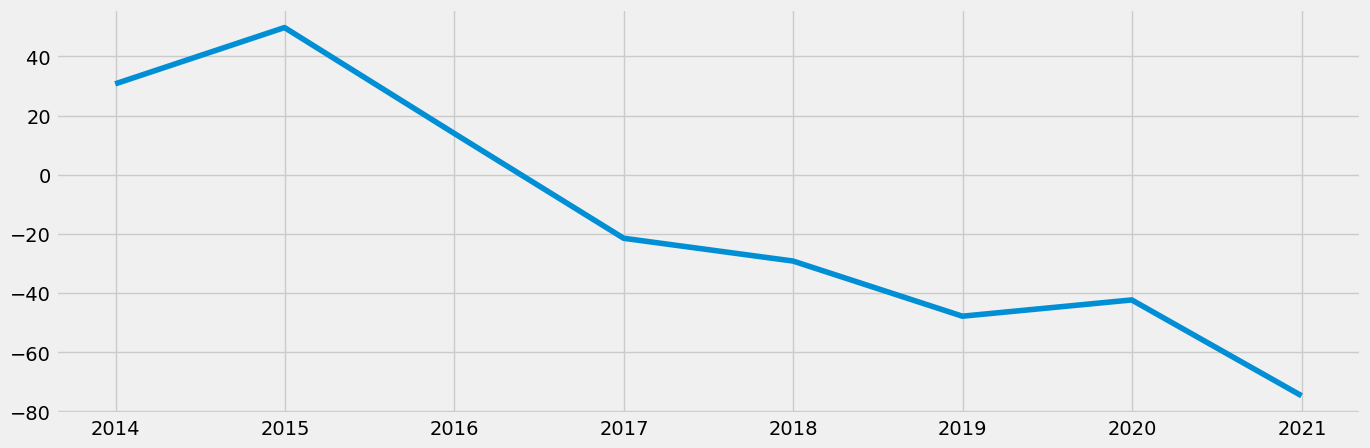

In [117]:
plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [118]:
dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                -1.315488
p-value                        0.622057
Number of Lags Used            1.000000
Number of Observations Used    6.000000
Critical Value (1%)           -5.354256
Critical Value (5%)           -3.646238
Critical Value (10%)          -2.901198
dtype: float64


The test statistic is still larger than the critical value and the p-value is larger than .05 meaning the results can't reject the null hypothesis and are still insignificant, but these are the best results I could achieve by changing the shift from 1-5.

# 9

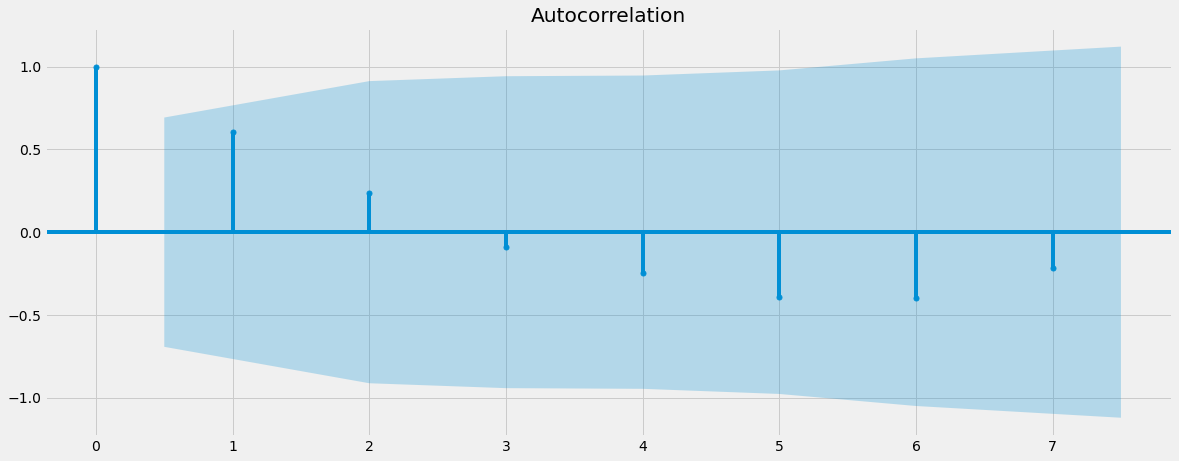

In [119]:
plot_acf(data_diff)
plt.show()